## Task 


1. Load the iris dataset using scikit-learn.

2. Split the dataset into training and testing sets with 70% of the data for training and 30% for testing.

3. Train a decision tree classifier using the entropy criterion and evaluate its accuracy on the testing set.

4. Train another decision tree classifier using the gini criterion and evaluate its accuracy on the testing set.

5. Compare the performance of the two classifiers and discuss the differences in terms of accuracy.

6. Visualize the decision tree for each classifier and compare the tree structure and feature importance.


__Note:__ You can use the tree.plot_tree() function to visualize the decision tree, and the feature_importances_ attribute to get the feature importances for each classifier.

The __feature importance values__ can be used to understand which features have the strongest association with the target variable and how they contribute to the model's prediction.

In [1]:
import pandas as pd
import numpy as np


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
#imports
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd

In [3]:
data = load_iris()

In [4]:
type(data)


sklearn.utils.Bunch

In [5]:
data = load_iris()
X = pd.DataFrame(data=data.data, columns=data.feature_names)

In [19]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
type(data)

sklearn.utils.Bunch

In [37]:
X.shape



(150, 4)

In [9]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
y = data.target

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
for column in X.columns:
    print(f"Number of null values in {column}: {X[column].isnull().sum()}")

Number of null values in sepal length (cm): 0
Number of null values in sepal width (cm): 0
Number of null values in petal length (cm): 0
Number of null values in petal width (cm): 0


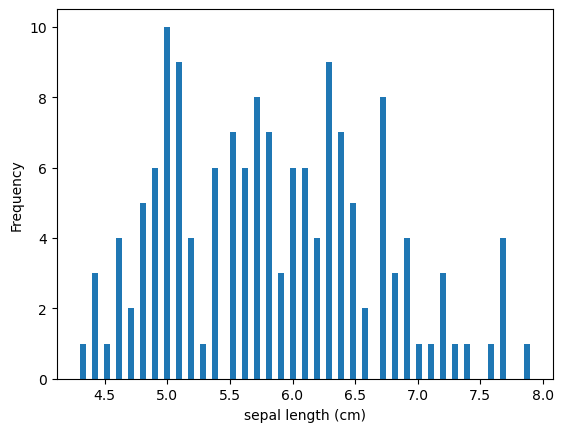

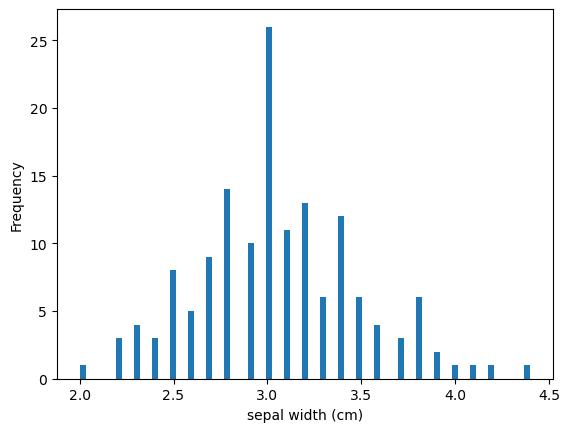

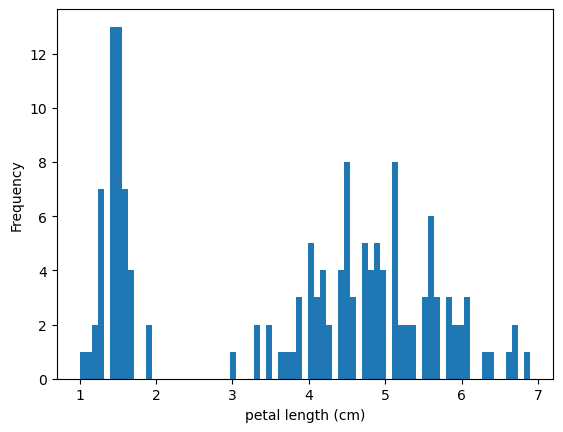

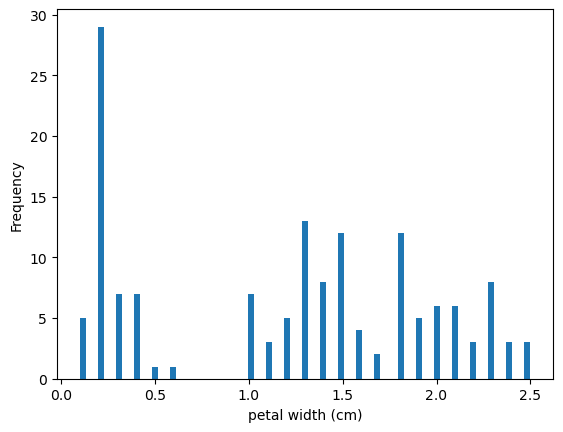

In [32]:
for column in X.columns:
    if column != 'day':
        fig, ax = plt.subplots()
        ax.hist(X[column], bins=75)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        plt.show()

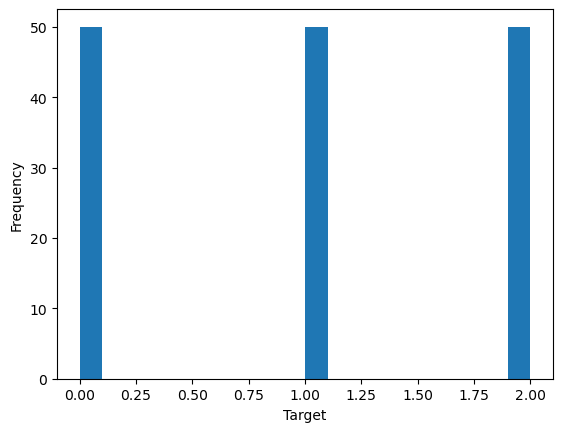

In [36]:
fig, ax = plt.subplots()
ax.hist(y, bins=20)
ax.set_xlabel('Target')
ax.set_ylabel('Frequency')
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [52]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'pandas.core.frame.DataFrame'> (45, 4)
<class 'pandas.core.frame.DataFrame'> (105, 4)
<class 'numpy.ndarray'> (45,)
<class 'numpy.ndarray'> (105,)


In [53]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)

DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [54]:
DTC_Model.score(X_train , y_train)

1.0

In [55]:
y_pred = DTC_Model.predict(X_test)

In [56]:
DTC_Model.score(X_test , y_test)

0.9428571428571428

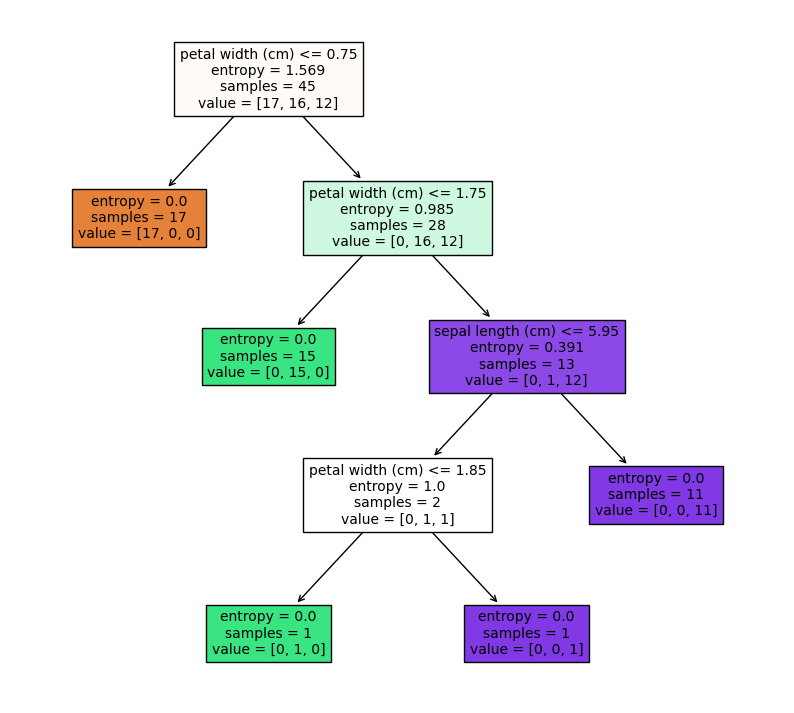

In [49]:
# DTC_tree = tree.plot_tree(DTC_Model)
plt.figure(figsize=(10, 9))

DTC_tree = tree.plot_tree(DTC_Model, filled=True, 
                          feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'],
                          fontsize=10
                          )


In [64]:

DTC_Model_gini=DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)

DTC_Model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [67]:
DTC_Model_gini.score(X_train , y_train)

y_pred_gini = DTC_Model_gini.predict(X_test)

print(y_pred_gini)

# now print the actual labels
print(y_test)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 1 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 1 0 0 0 1 2 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2]


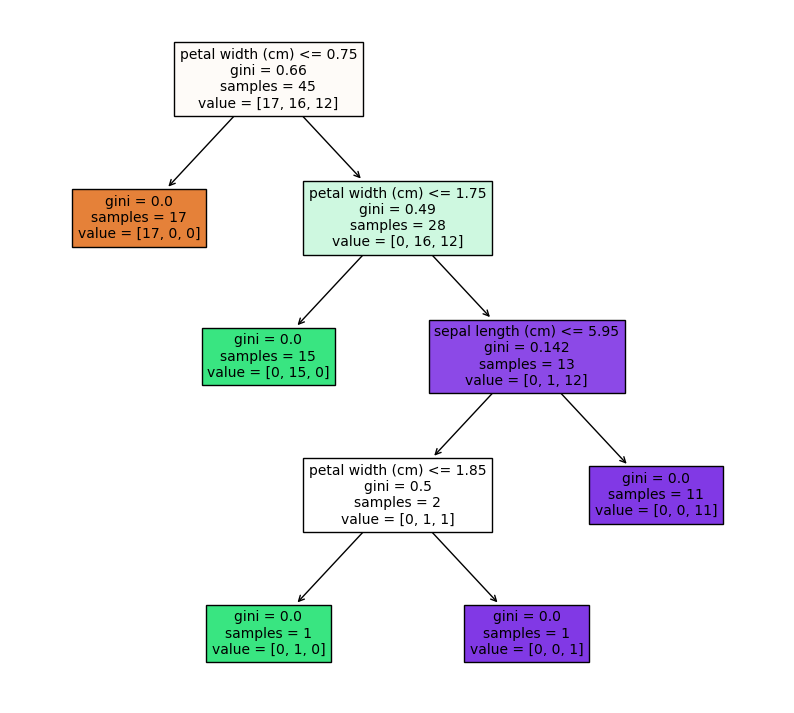

In [68]:
# DTC_tree = tree.plot_tree(DTC_Model)
plt.figure(figsize=(10, 9))

DTC_tree = tree.plot_tree(DTC_Model_gini, filled=True, 
                          feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'],
                          fontsize=10
                          )

Why there are more nodes of ID3 algorithm when we pratice on paper?

The perception that there are more nodes in the ID3 algorithm when practicing on paper is likely due to the availability of more space and the flexibility of formatting that comes with working on paper. However, the actual number of nodes and the complexity of the decision tree should remain the same regardless of the medium used to practice.